# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
import tensorflow.keras as keras

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
housing_data = fetch_california_housing()
X = housing_data.data
y = housing_data.target

In [4]:
print(X[1:3])
print(y[1:3])

[[ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]]
[3.585 3.521]


In [5]:
housing_data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

# Split train test

In [7]:
X_temp, X_test,y_temp,y_test = train_test_split(
    X,
    y,
    random_state=2024,
    test_size=0.2
)

X_train, X_valid,y_train, y_valid = train_test_split(
    X_temp,
    y_temp,
    random_state=2024,
    test_size=0.2
) 

# Train model

In [13]:

tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
413/413 [==============================] - 1s 2ms/step - loss: 0.7330 - root_mean_squared_error: 0.8562 - val_loss: 0.4448 - val_root_mean_squared_error: 0.6669
Epoch 2/20
413/413 [==============================] - 1s 2ms/step - loss: 0.4008 - root_mean_squared_error: 0.6331 - val_loss: 0.4062 - val_root_mean_squared_error: 0.6373
Epoch 3/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3758 - root_mean_squared_error: 0.6131 - val_loss: 0.3760 - val_root_mean_squared_error: 0.6132
Epoch 4/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3528 - root_mean_squared_error: 0.5940 - val_loss: 0.3701 - val_root_mean_squared_error: 0.6084
Epoch 5/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3309 - root_mean_squared_error: 0.5753 - val_loss: 0.3838 - val_root_mean_squared_error: 0.6195
Epoch 6/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3236 - root_mean_squared_error: 0.5689 - val_loss: 0.3567 - val_

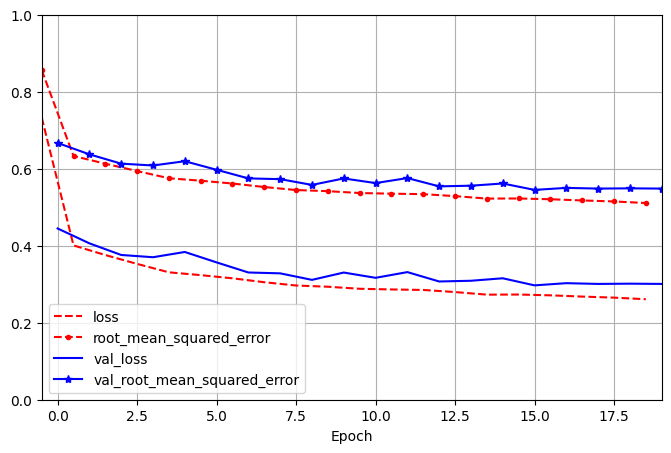

In [14]:
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 19, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

# Run Predictions

In [15]:
loss_test, rmse_test = model.evaluate(X_test, y_test)
print(loss_test, rmse_test)

129/129 [==============================] - 0s 1ms/step - loss: 0.3049 - root_mean_squared_error: 0.5522
0.30489808320999146 0.552175760269165
